In [4]:
# load dataset
from p_efficientnet_b7_500_new import define
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader

transforms = define.transform()

test_data = ImageFolder(f"{define.get_datafolder()}/test", transform=transforms)
test_loader = DataLoader(test_data, batch_size=8, shuffle=True)

In [5]:
# define model
model = define.create_model()
model_desc = define.model_desc()
model_directory_name = define.__file__.replace("\\", "/").split("/")[-2]

In [6]:
# create runner
import util

runner = util.Runner(model, default_dir=model_directory_name)
print(f"runner use {runner.device}")
runner.load("p_efficientnet_b7_500_new/m_0726_1024314b2ecaf1.pth") # load latest model

runner use cuda
loaded p_efficientnet_b7_500_new/m_0726_1024314b2ecaf1.pth


100%|██████████| 13/13 [00:01<00:00, 11.35it/s]


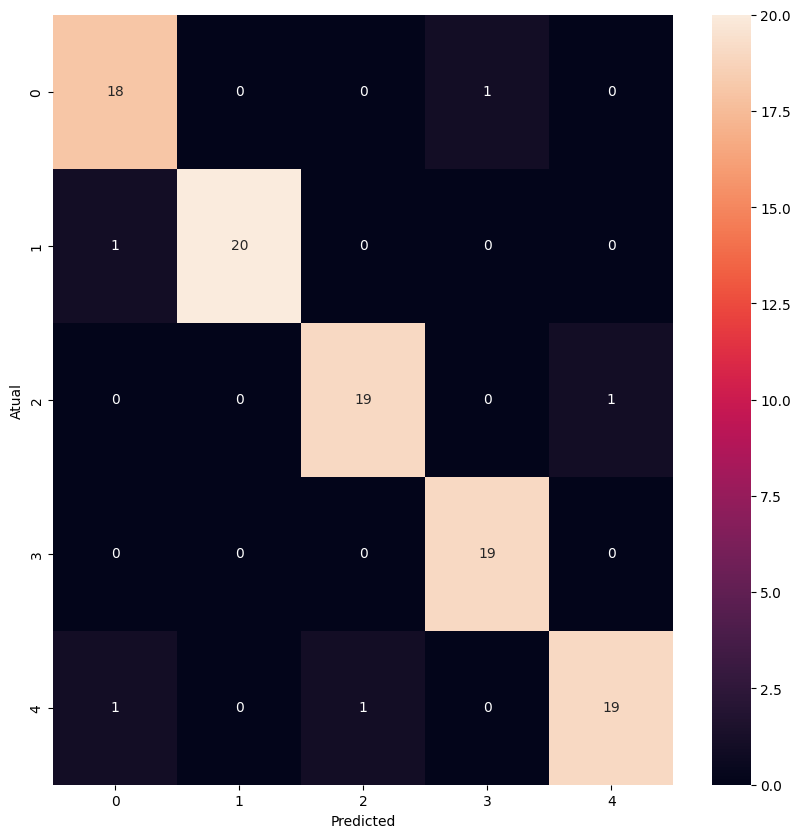

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import torch
from torch import nn

targets = []
results = []
def func(data, target, result):
    global targets, results
    targets.append(target)
    results.append(result)
criterion = nn.CrossEntropyLoss() 
runner.test(test_loader, criterion, func)
targets = torch.cat(targets, dim=0)
results = torch.cat(results, dim=0)

conf_matrix = confusion_matrix(results.to('cpu'), targets.to('cpu'))

plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Atual')
plt.show()

  0%|          | 0/13 [00:00<?, ?it/s]

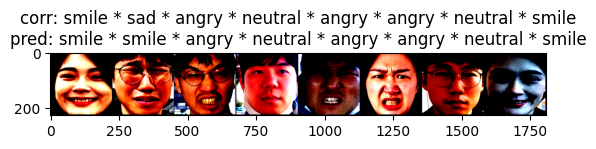

  8%|▊         | 1/13 [00:00<00:02,  4.31it/s]

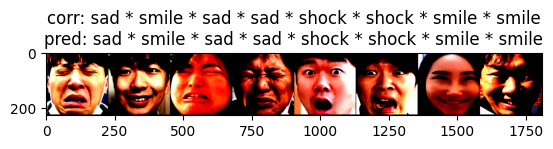

 15%|█▌        | 2/13 [00:00<00:02,  4.46it/s]

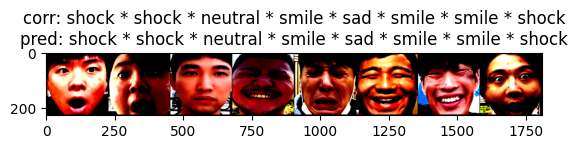

 23%|██▎       | 3/13 [00:00<00:02,  4.43it/s]

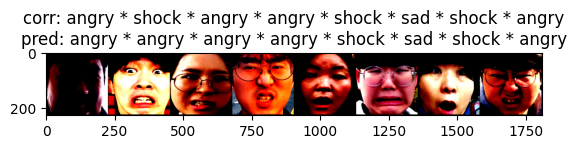

 31%|███       | 4/13 [00:00<00:02,  4.38it/s]

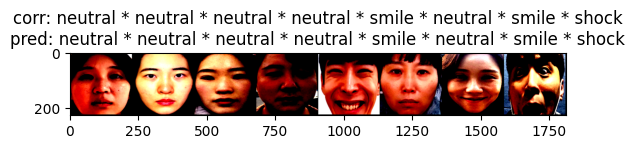

 38%|███▊      | 5/13 [00:01<00:01,  4.35it/s]

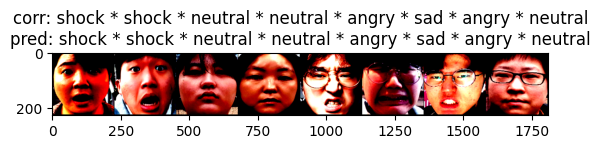

 46%|████▌     | 6/13 [00:01<00:01,  4.46it/s]

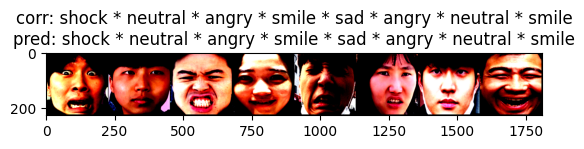

 54%|█████▍    | 7/13 [00:01<00:01,  4.56it/s]

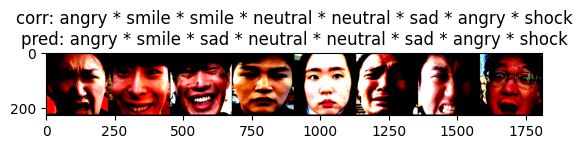

 62%|██████▏   | 8/13 [00:01<00:01,  4.53it/s]

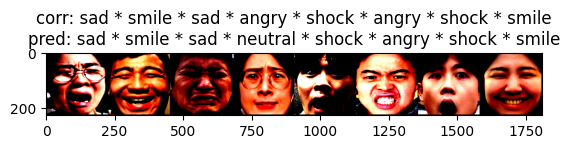

 69%|██████▉   | 9/13 [00:02<00:00,  4.15it/s]


KeyboardInterrupt: 

In [9]:
import util

def func(data, target, result):
    data = data.to('cpu')
    corr = [ test_data.classes[x] for x in target ]
    pred = [ test_data.classes[x] for x in result ]
    title = f"corr: {' * '.join(corr)}\npred: {' * '.join(pred)}"
    util.show2(data, title)
runner.test(test_loader, criterion, func)